In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/Advertising.csv', index_col='Unnamed: 0')
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


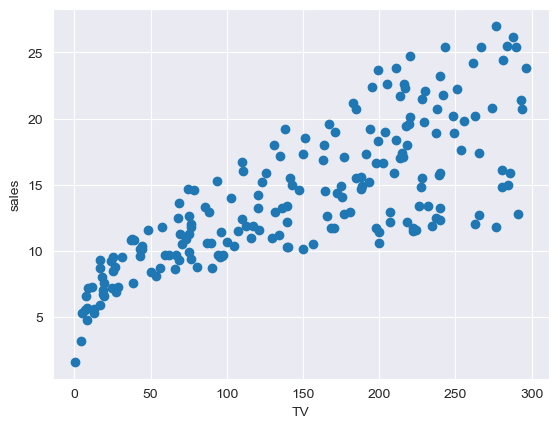

In [2]:
# Correlation btn TV and sales
plt.scatter(df['TV'], df['sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

In [3]:
# Show statistics of data
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('sales ~ TV+radio+newspaper', df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.58e-96
Time:                        10:04:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [4]:
correlation_matrix = df.corr()
print(correlation_matrix)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


<Axes: >

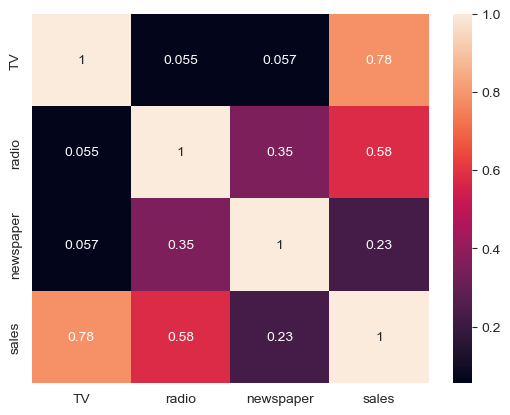

In [5]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [7]:
# Look at top 5 largest newspaper budget in correlation to sales
df.loc[df['newspaper'].nlargest(5).index]

,TV,radio,newspaper,sales
17,67.8,36.6,114.0,12.5
102,296.4,36.3,100.9,23.8
76,16.9,43.7,89.4,8.7
166,234.5,3.4,84.8,11.9
119,125.7,36.9,79.2,15.9


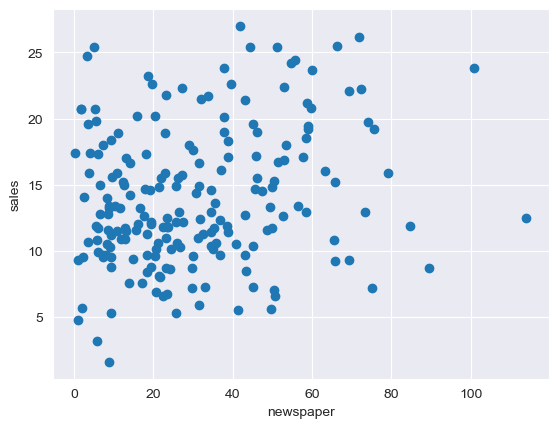

In [8]:
plt.scatter(df['newspaper'], df['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.show()

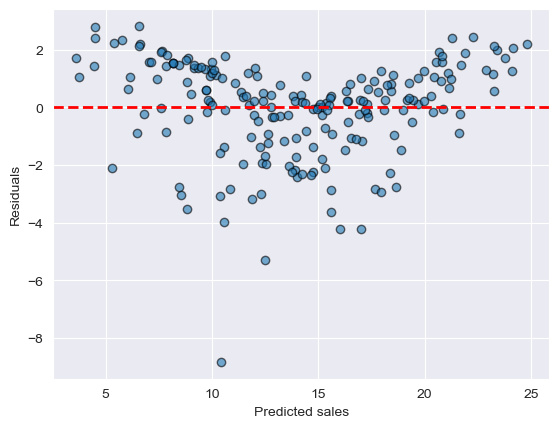

In [15]:
y_pred = model.predict()
residuals = df['sales'] - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='r',linestyle='--',linewidth=2)
plt.xlabel('Predicted sales')
plt.ylabel('Residuals')
plt.show()

# LAB LINEAR REGRESSION

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

boston = pd.read_csv('datasets/boston.csv', index_col='Unnamed: 0')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [19]:
X = pd.DataFrame({'intercept':np.ones(boston.shape[0]),
                  'lstat': boston['lstat'],})
X[:4], boston.shape

(   intercept  lstat
 1        1.0   4.98
 2        1.0   9.14
 3        1.0   4.03
 4        1.0   2.94,
 (506, 13))

In [20]:
y = boston['medv']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           5.08e-88
Time:                        01:21:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.0

In [21]:
new_df = pd.DataFrame({
    'intercept': np.ones(3),
    'lstat':[5,10,15],
})
new_df.head()

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [25]:
new_preds = results.get_prediction(new_df)

In [31]:
new_preds.predicted_mean, results.params[0], results.params[1]

/var/folders/j0/tr2332417vjbmj74tfc0dcd40000gn/T/ipykernel_1113/3314568854.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_preds.predicted_mean, results.params[0], results.params[1]


(array([29.80359411, 25.05334734, 20.30310057]),
 34.553840879383095,
 -0.95004935375799)

/var/folders/j0/tr2332417vjbmj74tfc0dcd40000gn/T/ipykernel_1113/4250360746.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], color='r')


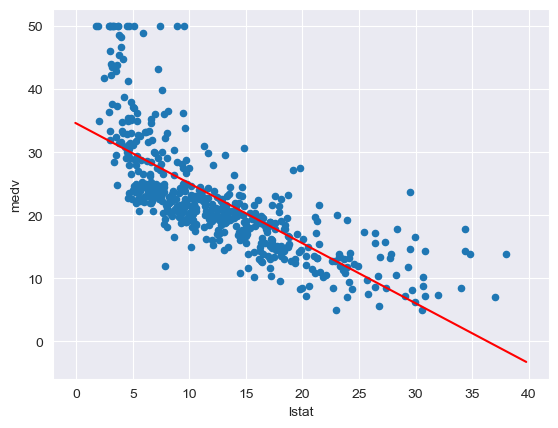

In [30]:
def abline(ax, b,m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] +b, m * xlim[1] +b]
    ax.plot(xlim, ylim, *args, **kwargs)
ax = boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], color='r')

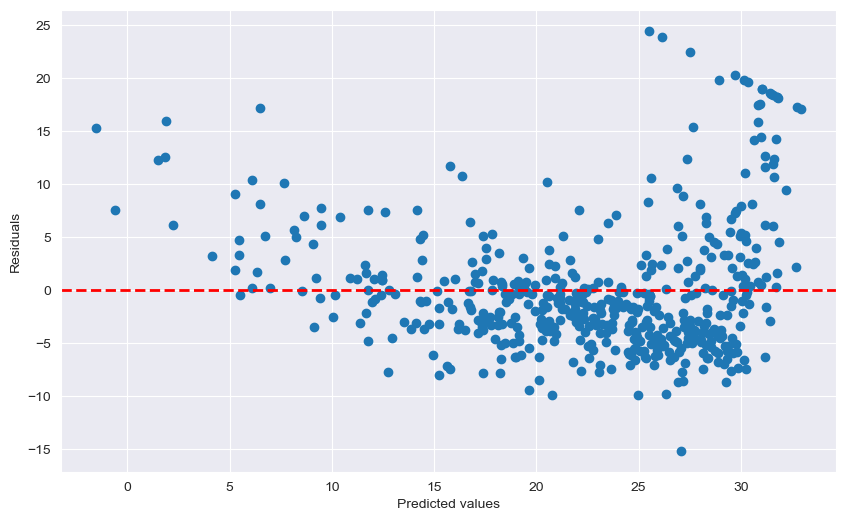

In [34]:
# Diagnostic plots
ax = plt.subplots(figsize=(10,6))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.axhline(0, color='r',linestyle='--',linewidth=2)